In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: xlabel='Urban', ylabel='count'>

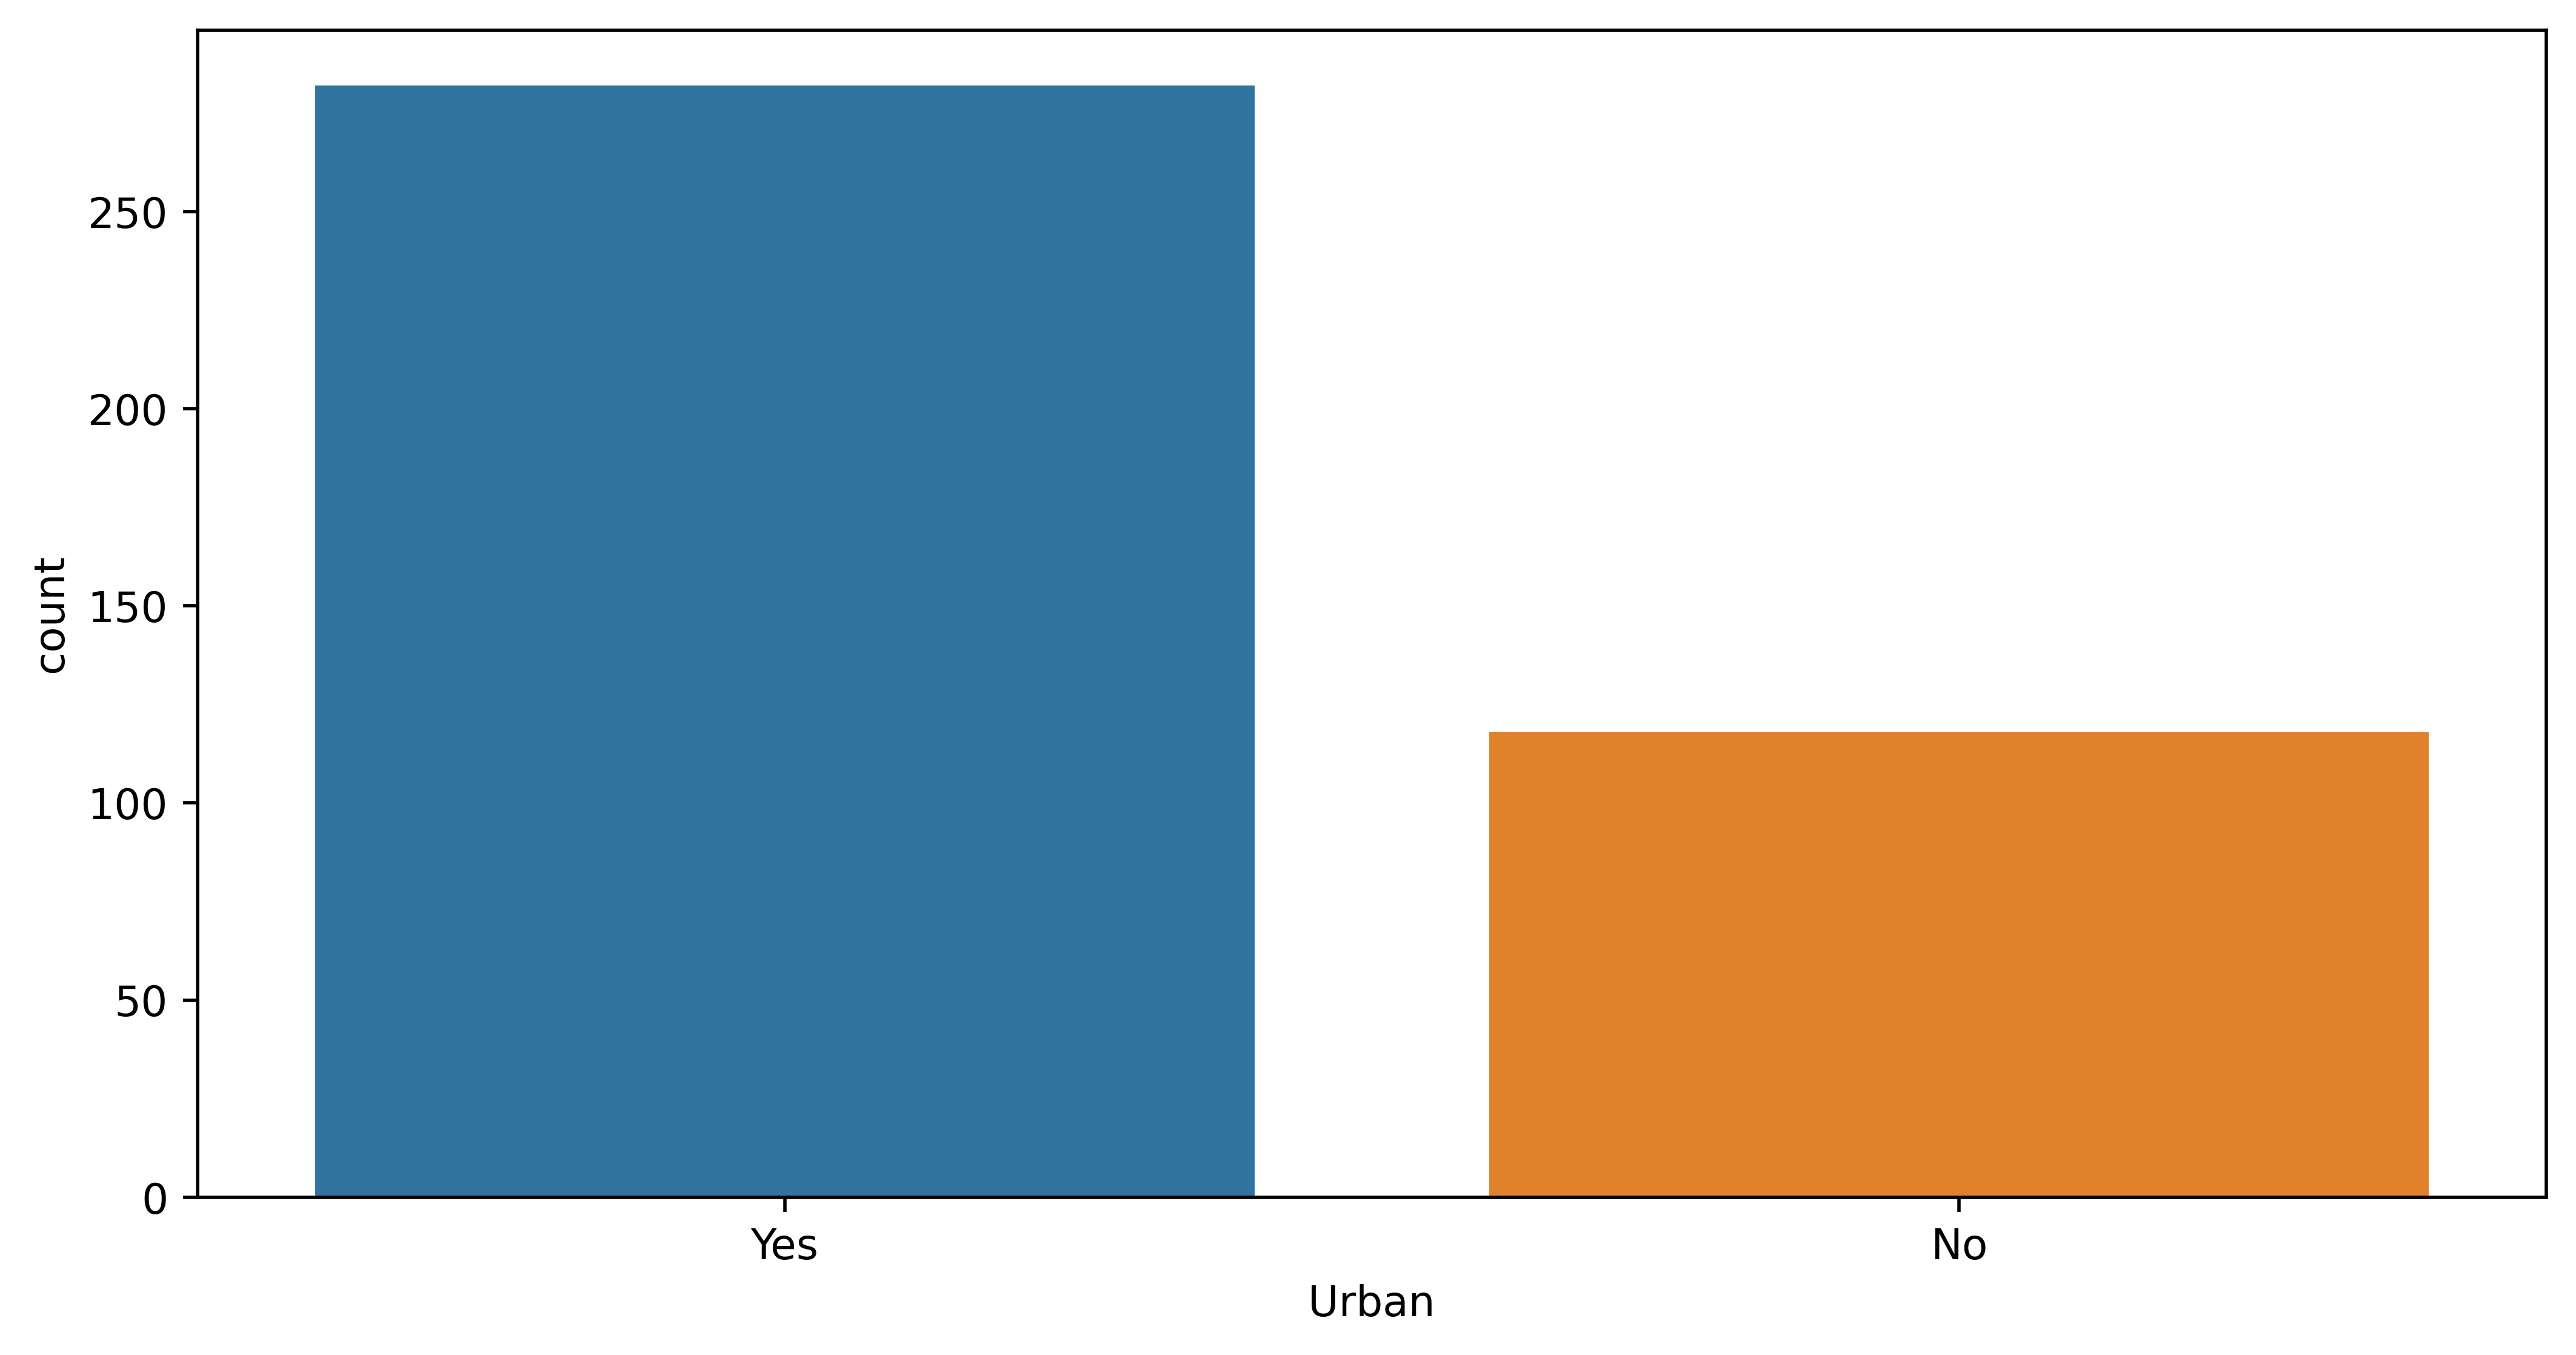

In [7]:
sns.countplot(x = df['Urban'])

<Axes: xlabel='ShelveLoc', ylabel='count'>

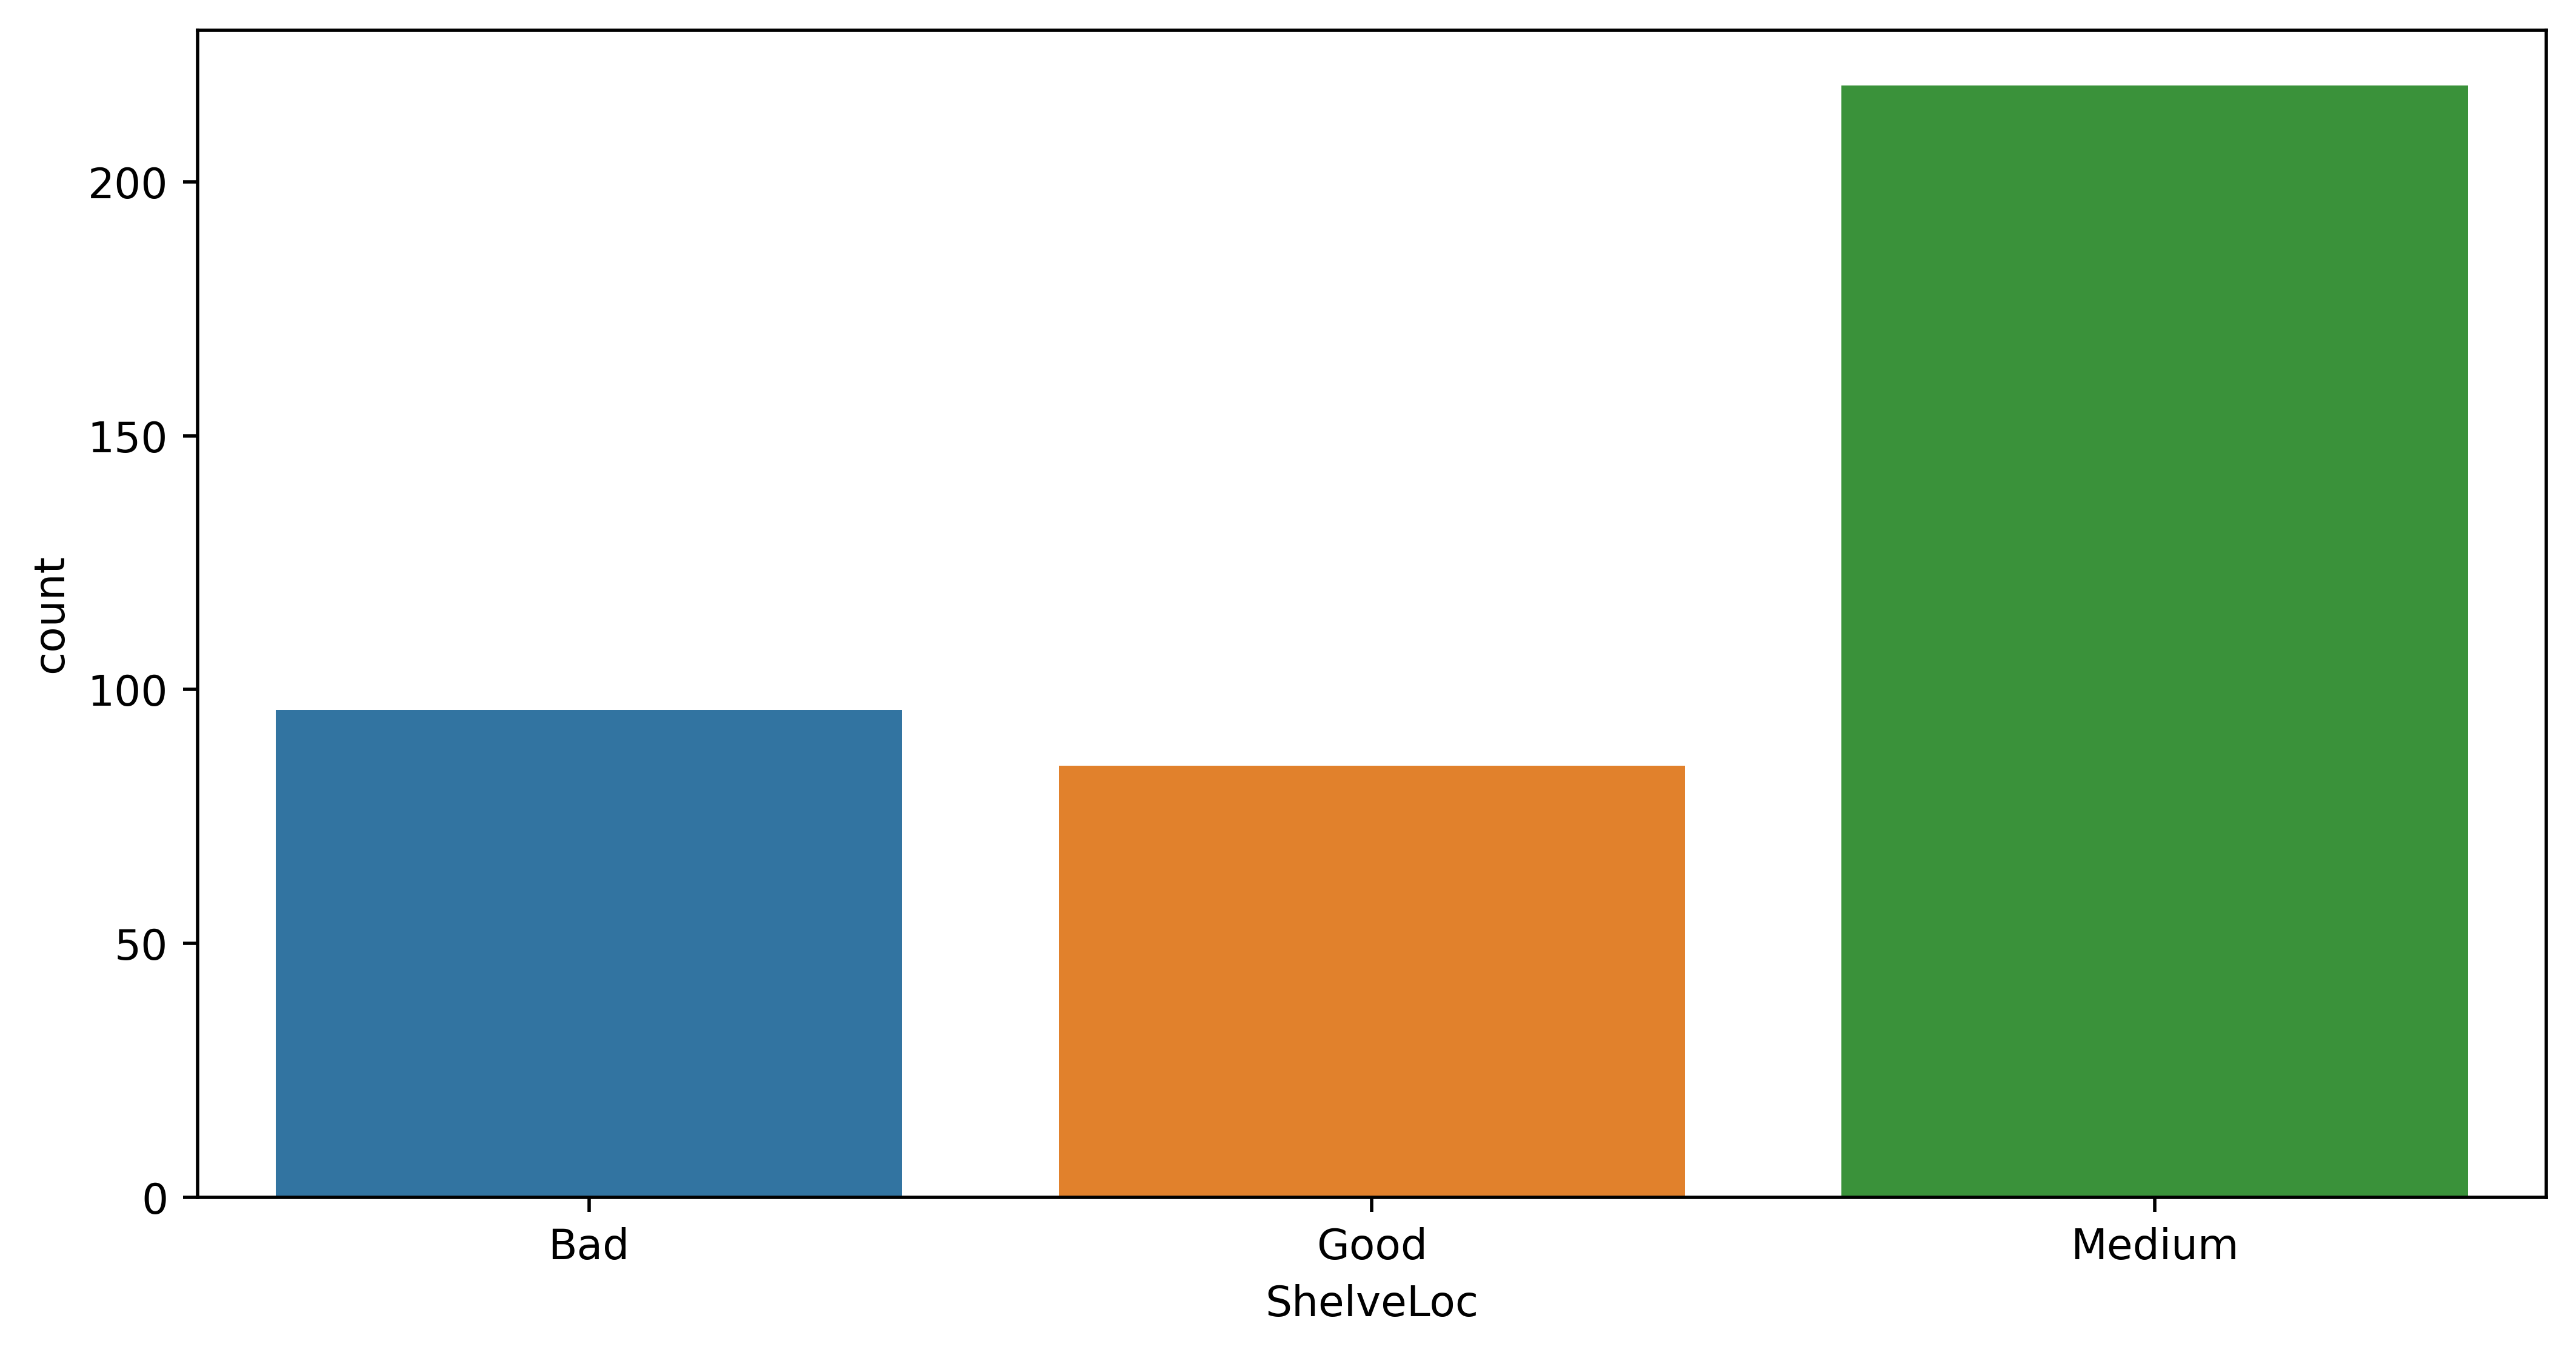

In [8]:
sns.countplot(x = df['ShelveLoc'])

<Axes: >

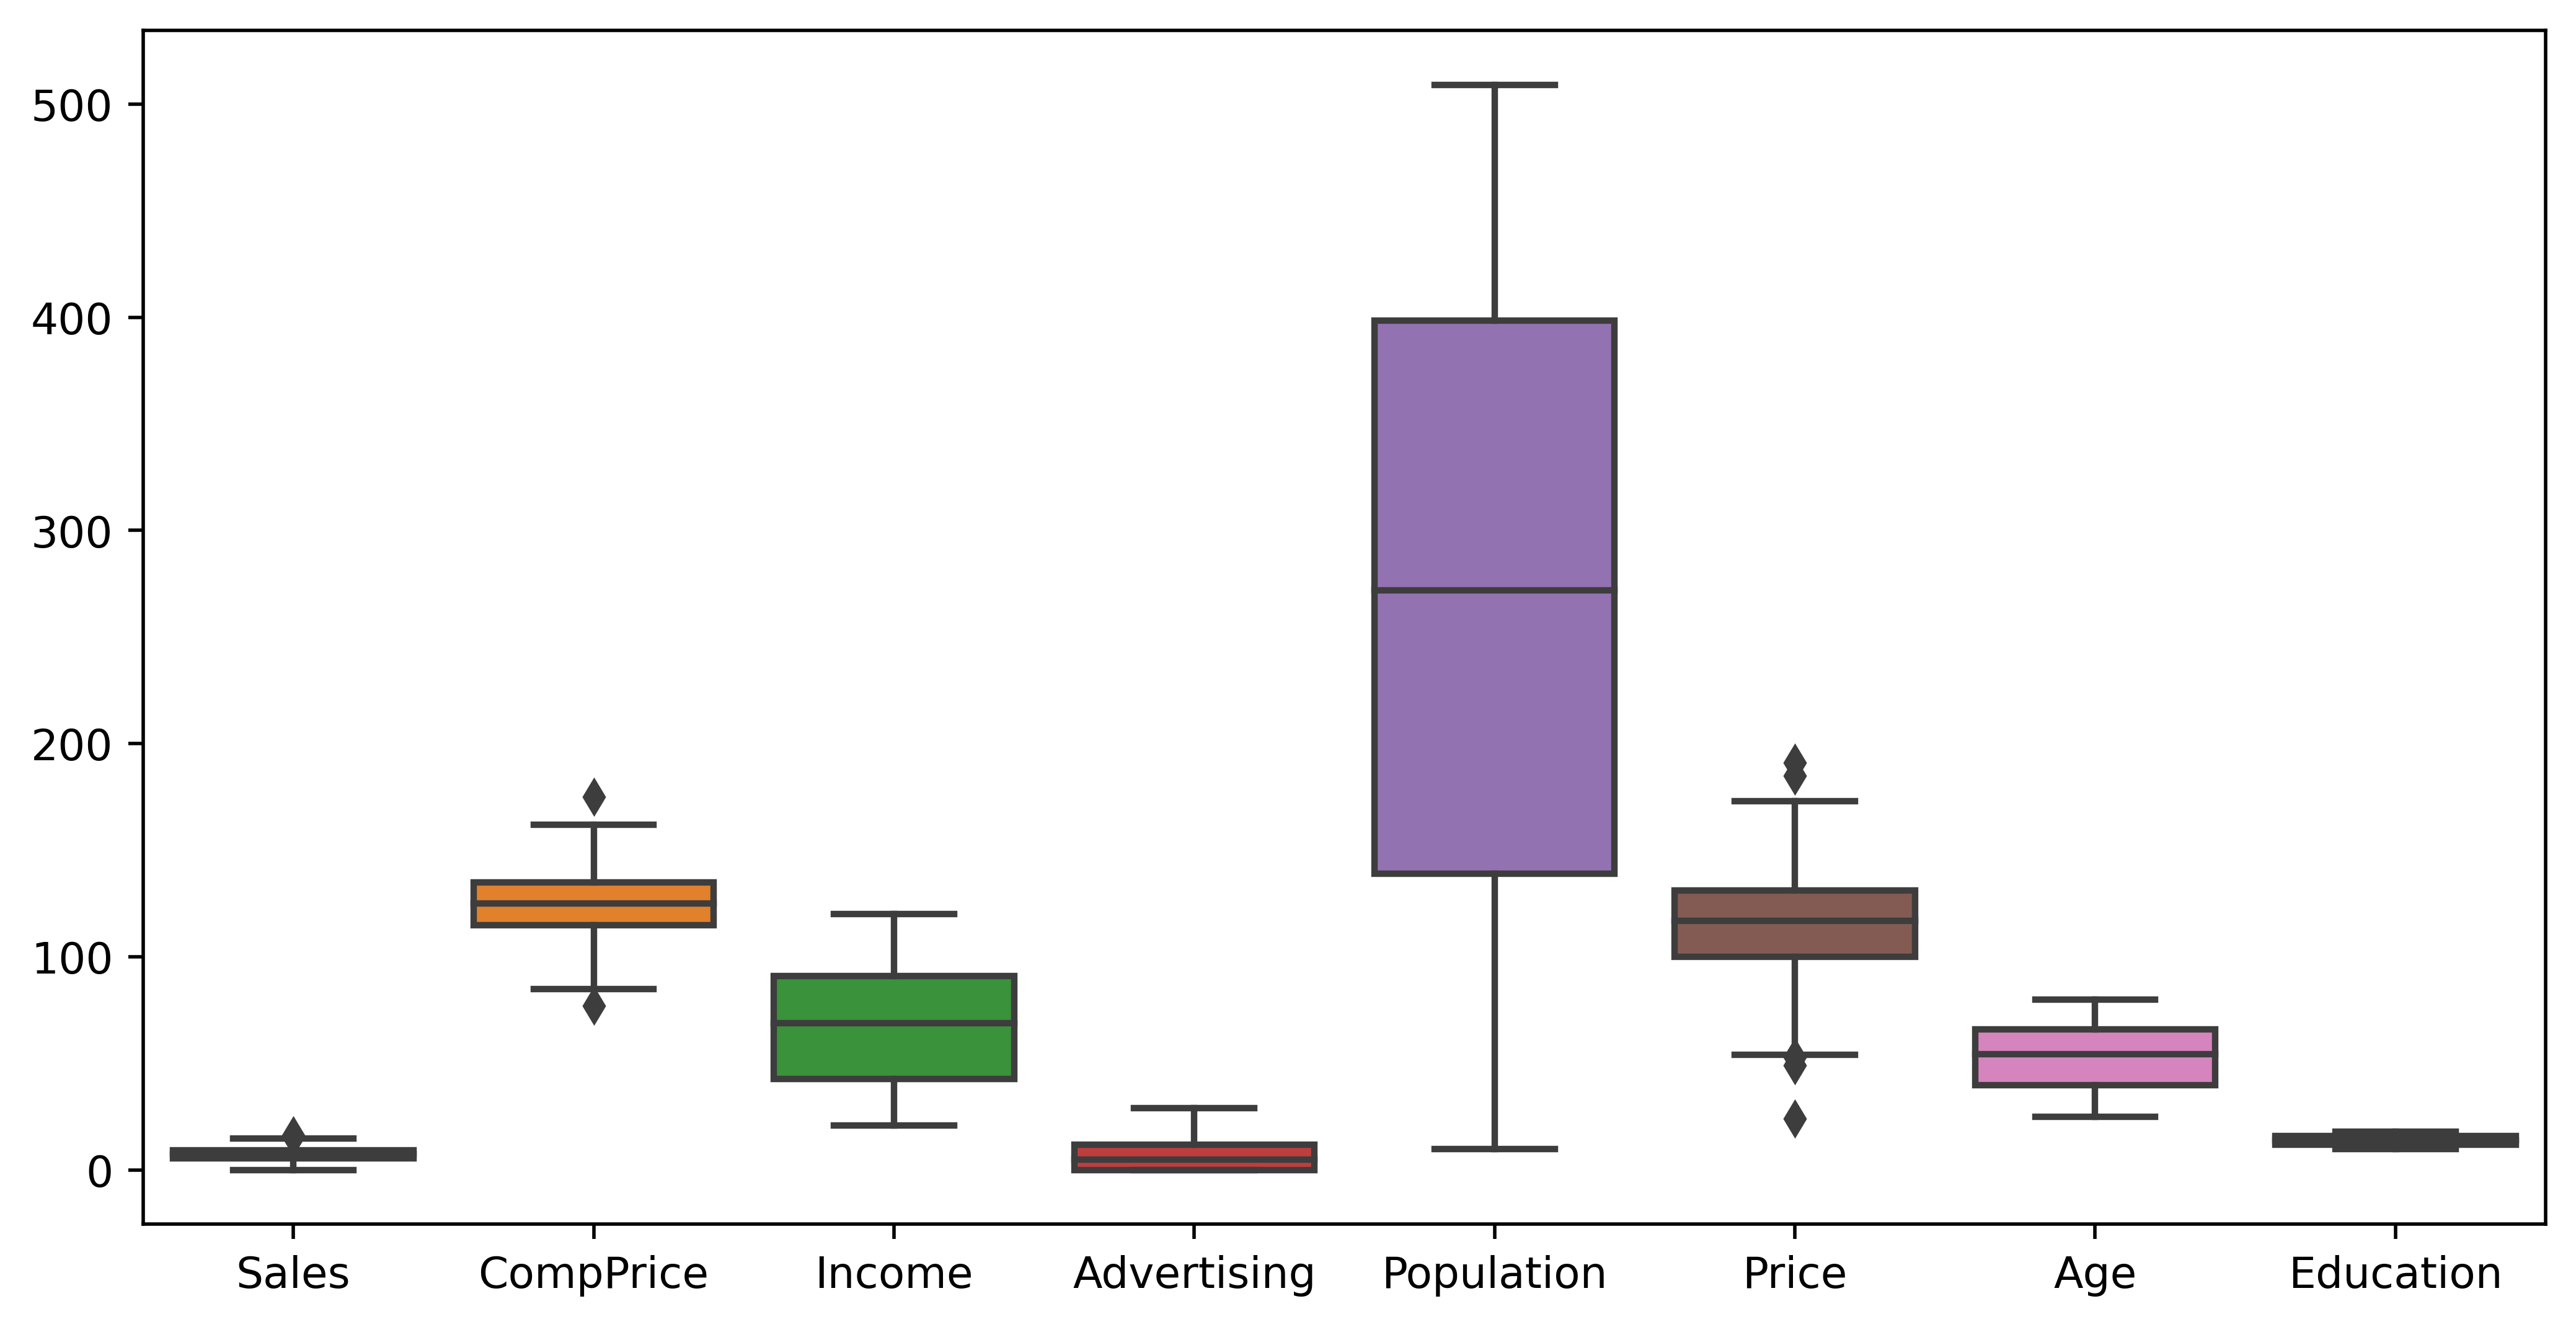

In [9]:
sns.boxplot(df)

In [10]:
#divide the data based on mean sales valuse 
df.Sales.mean()

7.496325000000001

In [11]:
df['Sales'] = [1 if i>= df.Sales.mean() else 0 for i in df.Sales]

In [12]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['ShelveLoc'] = LE.fit_transform(df['ShelveLoc'])
df['Urban'] = LE.fit_transform(df['Urban'])
df['US'] = LE.fit_transform(df['US'])

In [13]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


-----------
* Data cleaning, removing an outliers

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
# training the model
clf = IsolationForest(random_state = 10, contamination = .01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [16]:
#predictions
ypred_outliers = clf.predict(df)
ypred_outliers

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [17]:
df['outliers'] = ypred_outliers

In [18]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,outliers
0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,111,48,16,260,83,1,65,10,1,1,1
2,1,113,35,10,269,80,2,59,12,1,1,1
3,0,117,100,4,466,97,2,55,14,1,1,1
4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1,1
396,0,139,23,3,37,120,2,55,11,0,1,1
397,0,162,26,12,368,159,2,40,18,1,1,1
398,0,100,79,7,284,95,0,50,12,1,1,1


In [19]:
df[df.outliers == -1]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,outliers
5,1,124,113,13,501,72,0,78,16,0,1,-1
42,1,77,69,0,25,24,2,50,18,1,0,-1
75,1,88,111,23,480,92,0,36,16,0,1,-1
208,1,86,54,0,497,64,0,33,12,1,0,-1


In [20]:
data = df.drop(df.index[[5,42,75,208]], axis=0).reset_index()

In [21]:
data

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,outliers
0,0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,1,111,48,16,260,83,1,65,10,1,1,1
2,2,1,113,35,10,269,80,2,59,12,1,1,1
3,3,0,117,100,4,466,97,2,55,14,1,1,1
4,4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,1,138,108,17,203,128,1,33,14,1,1,1
392,396,0,139,23,3,37,120,2,55,11,0,1,1
393,397,0,162,26,12,368,159,2,40,18,1,1,1
394,398,0,100,79,7,284,95,0,50,12,1,1,1


In [22]:
data = data.drop(['outliers','index'], axis=1)

In [23]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,1,138,108,17,203,128,1,33,14,1,1
392,0,139,23,3,37,120,2,55,11,0,1
393,0,162,26,12,368,159,2,40,18,1,1
394,0,100,79,7,284,95,0,50,12,1,1


In [24]:
#sns.pairplot(data)

In [25]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,outliers
0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,111,48,16,260,83,1,65,10,1,1,1
2,1,113,35,10,269,80,2,59,12,1,1,1
3,0,117,100,4,466,97,2,55,14,1,1,1
4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1,1
396,0,139,23,3,37,120,2,55,11,0,1,1
397,0,162,26,12,368,159,2,40,18,1,1,1
398,0,100,79,7,284,95,0,50,12,1,1,1


---------------
* splitting into features & target

In [26]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

------------
* train test split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=44)

In [28]:
#by using entropy
DT= DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [29]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
ypred = DT.predict(x_test)
ypred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
print(f'CLASSIFICATION REPORT\n {classification_report(y_test,ypred)}')

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.51      0.88      0.65        48
           1       0.84      0.44      0.57        71

    accuracy                           0.61       119
   macro avg       0.68      0.66      0.61       119
weighted avg       0.71      0.61      0.60       119



In [32]:
print(f' Training accuracy : {DT.score(x_train,y_train)}')
print(f' Testing accuracy : {DT.score(x_test,y_test)}')

 Training accuracy : 0.7725631768953068
 Testing accuracy : 0.6134453781512605


In [33]:
X = data.iloc[:,1:]

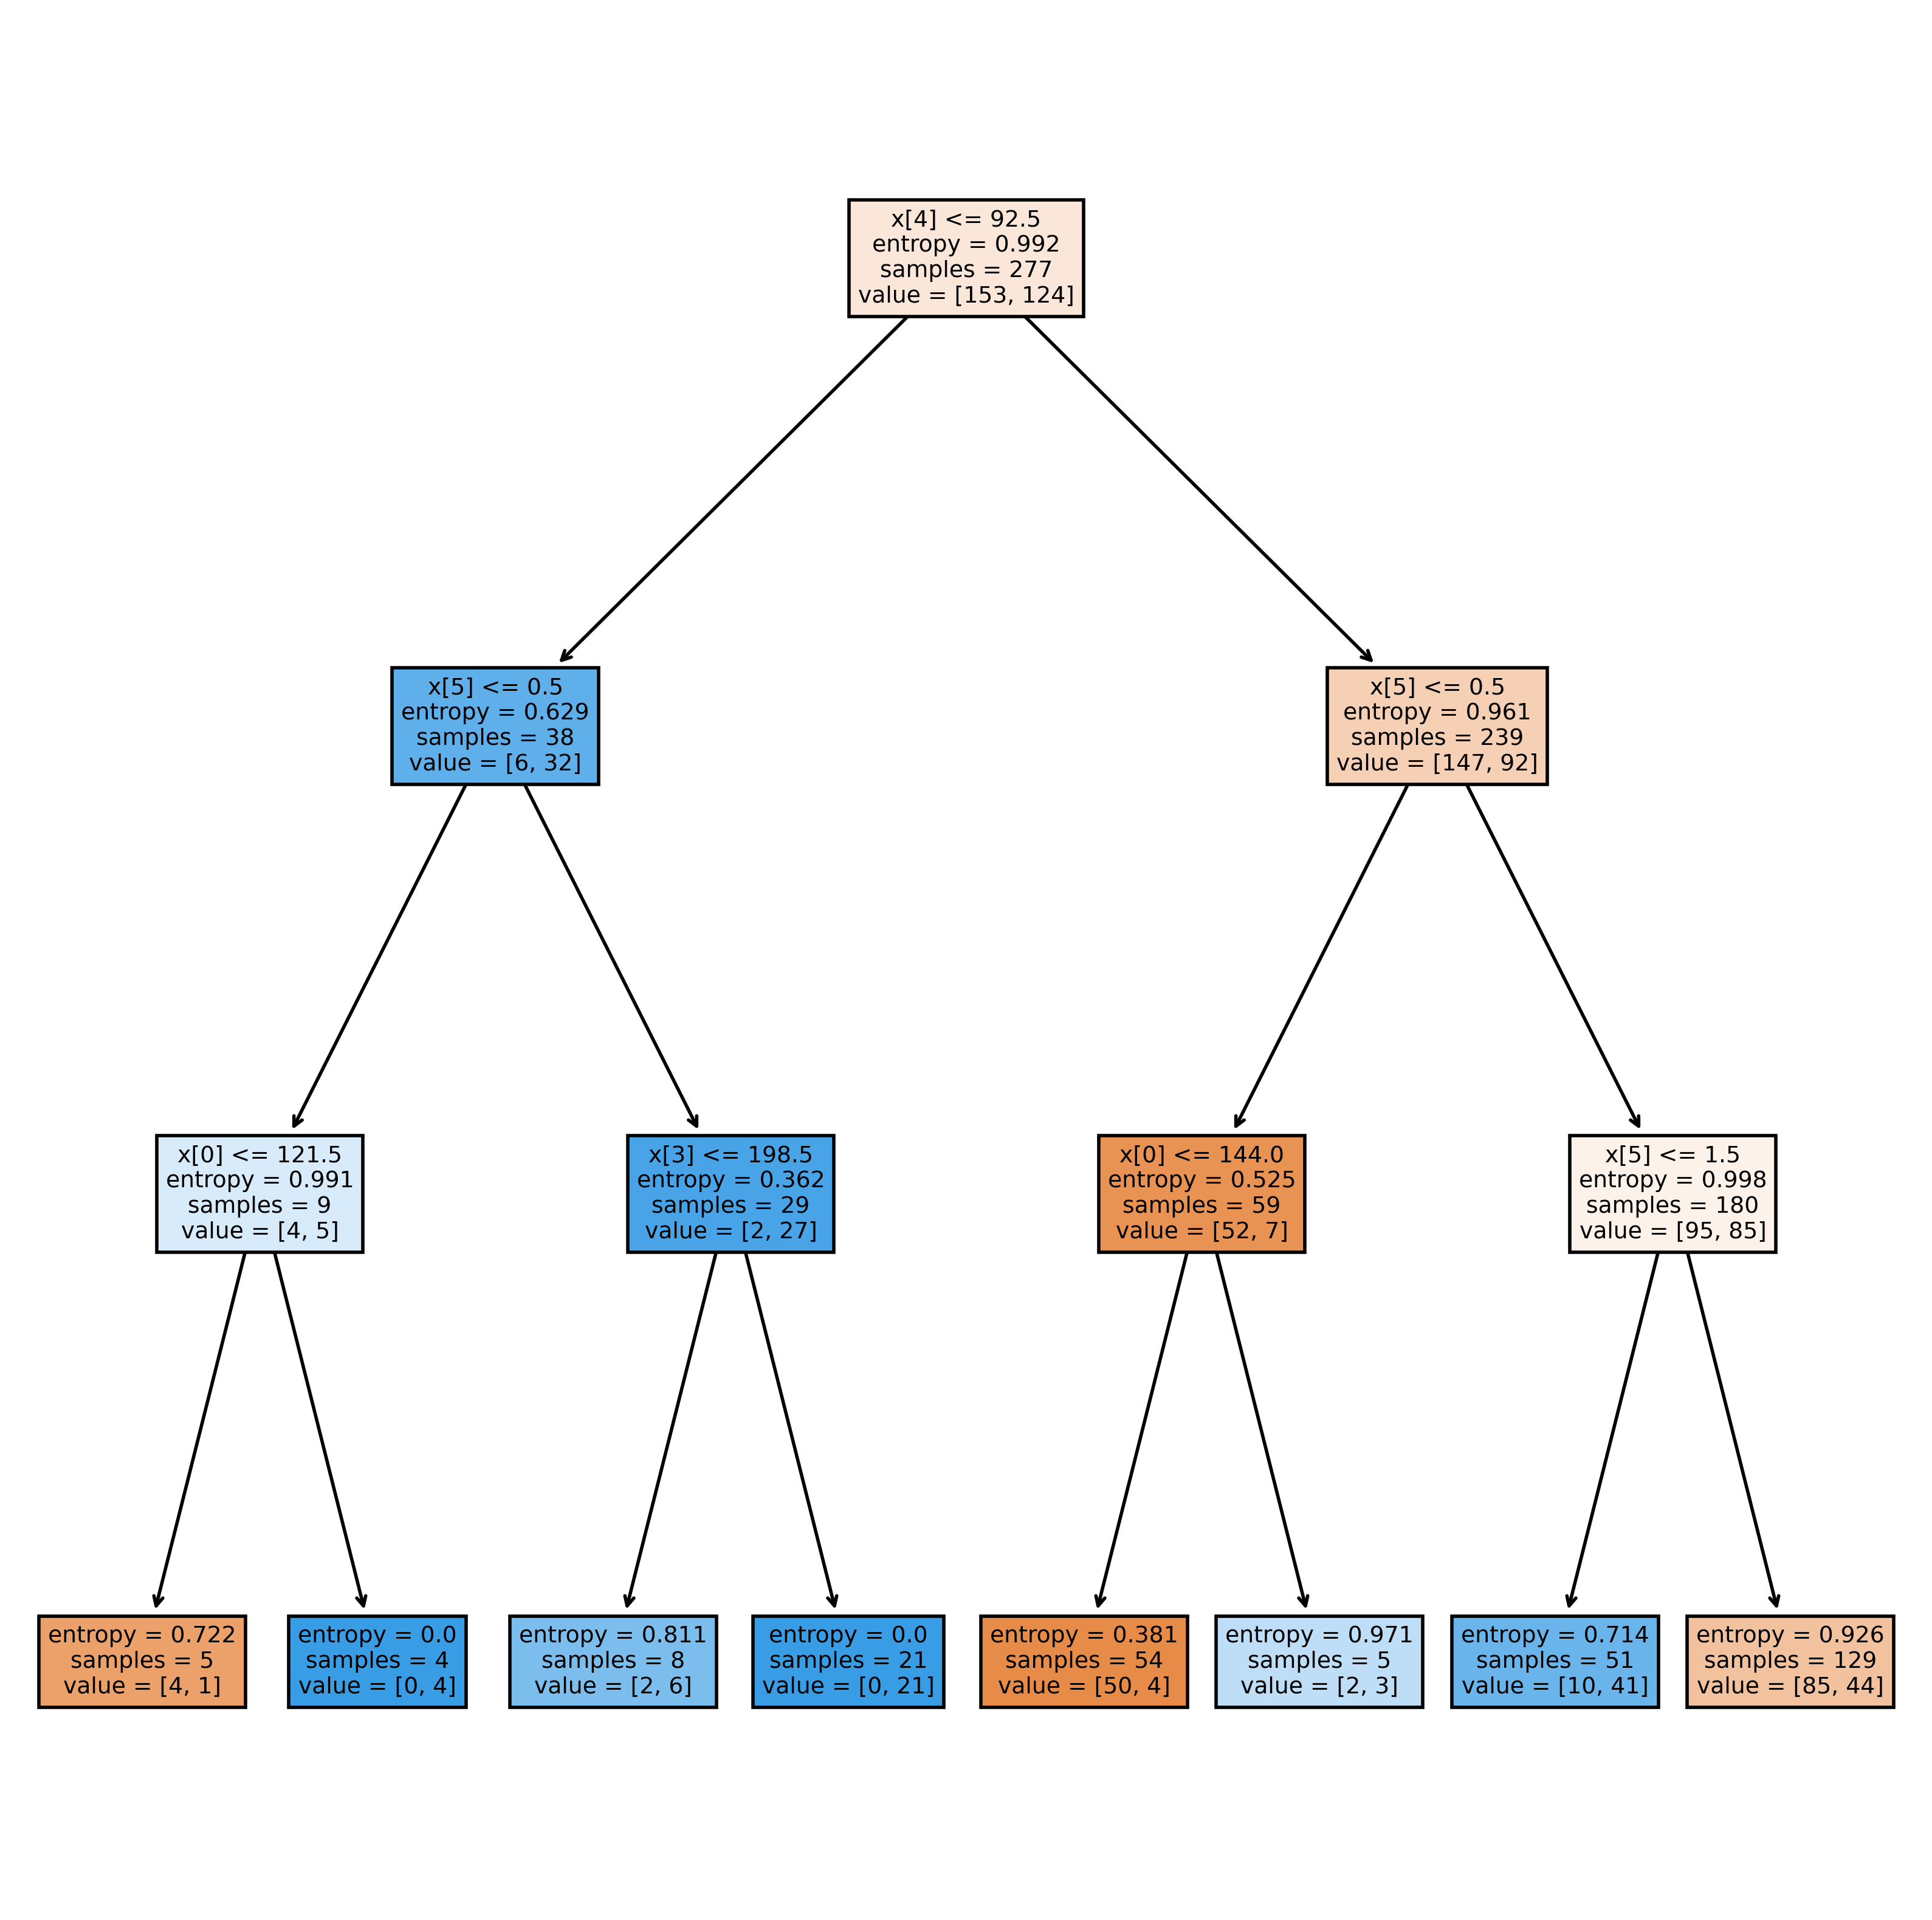

In [34]:
plt.figure(figsize=(10,10), dpi = 400)
tree.plot_tree(DT.fit(x_train,y_train), filled=True);

---------------
* Hyperparameter Tuning for KNN

In [35]:
from sklearn.model_selection import GridSearchCV

params = [{
    'criterion' : ['entropy','gini'], 'max_depth' : np.arange(3,150)
}]

model = DecisionTreeClassifier()
estimator = model


In [36]:
grid = GridSearchCV(estimator, param_grid = params, cv = 10)


In [37]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149])}])

In [38]:
print(grid.best_score_)
print(grid.best_params_)

0.7501923076923076
{'criterion': 'gini', 'max_depth': 43}


In [39]:
param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(model,param1, cv=10)


In [40]:
clf2.fit(x,y)
print(clf2.best_score_)
print(clf2.best_params_)

0.7601282051282052
{'min_samples_leaf': 2, 'min_samples_split': 11}


In [41]:
grid.best_params_,clf2.best_params_

({'criterion': 'gini', 'max_depth': 43},
 {'min_samples_leaf': 2, 'min_samples_split': 11})

In [43]:
# modified model 
model = DecisionTreeClassifier(criterion = 'gini',max_depth=43,min_samples_leaf=3, min_samples_split= 10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=43, min_samples_leaf=3, min_samples_split=10)

In [44]:
#Predicting on test data
pred= model.predict(x_test) 

In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72        48
           1       0.83      0.75      0.79        71

    accuracy                           0.76       119
   macro avg       0.75      0.76      0.75       119
weighted avg       0.77      0.76      0.76       119



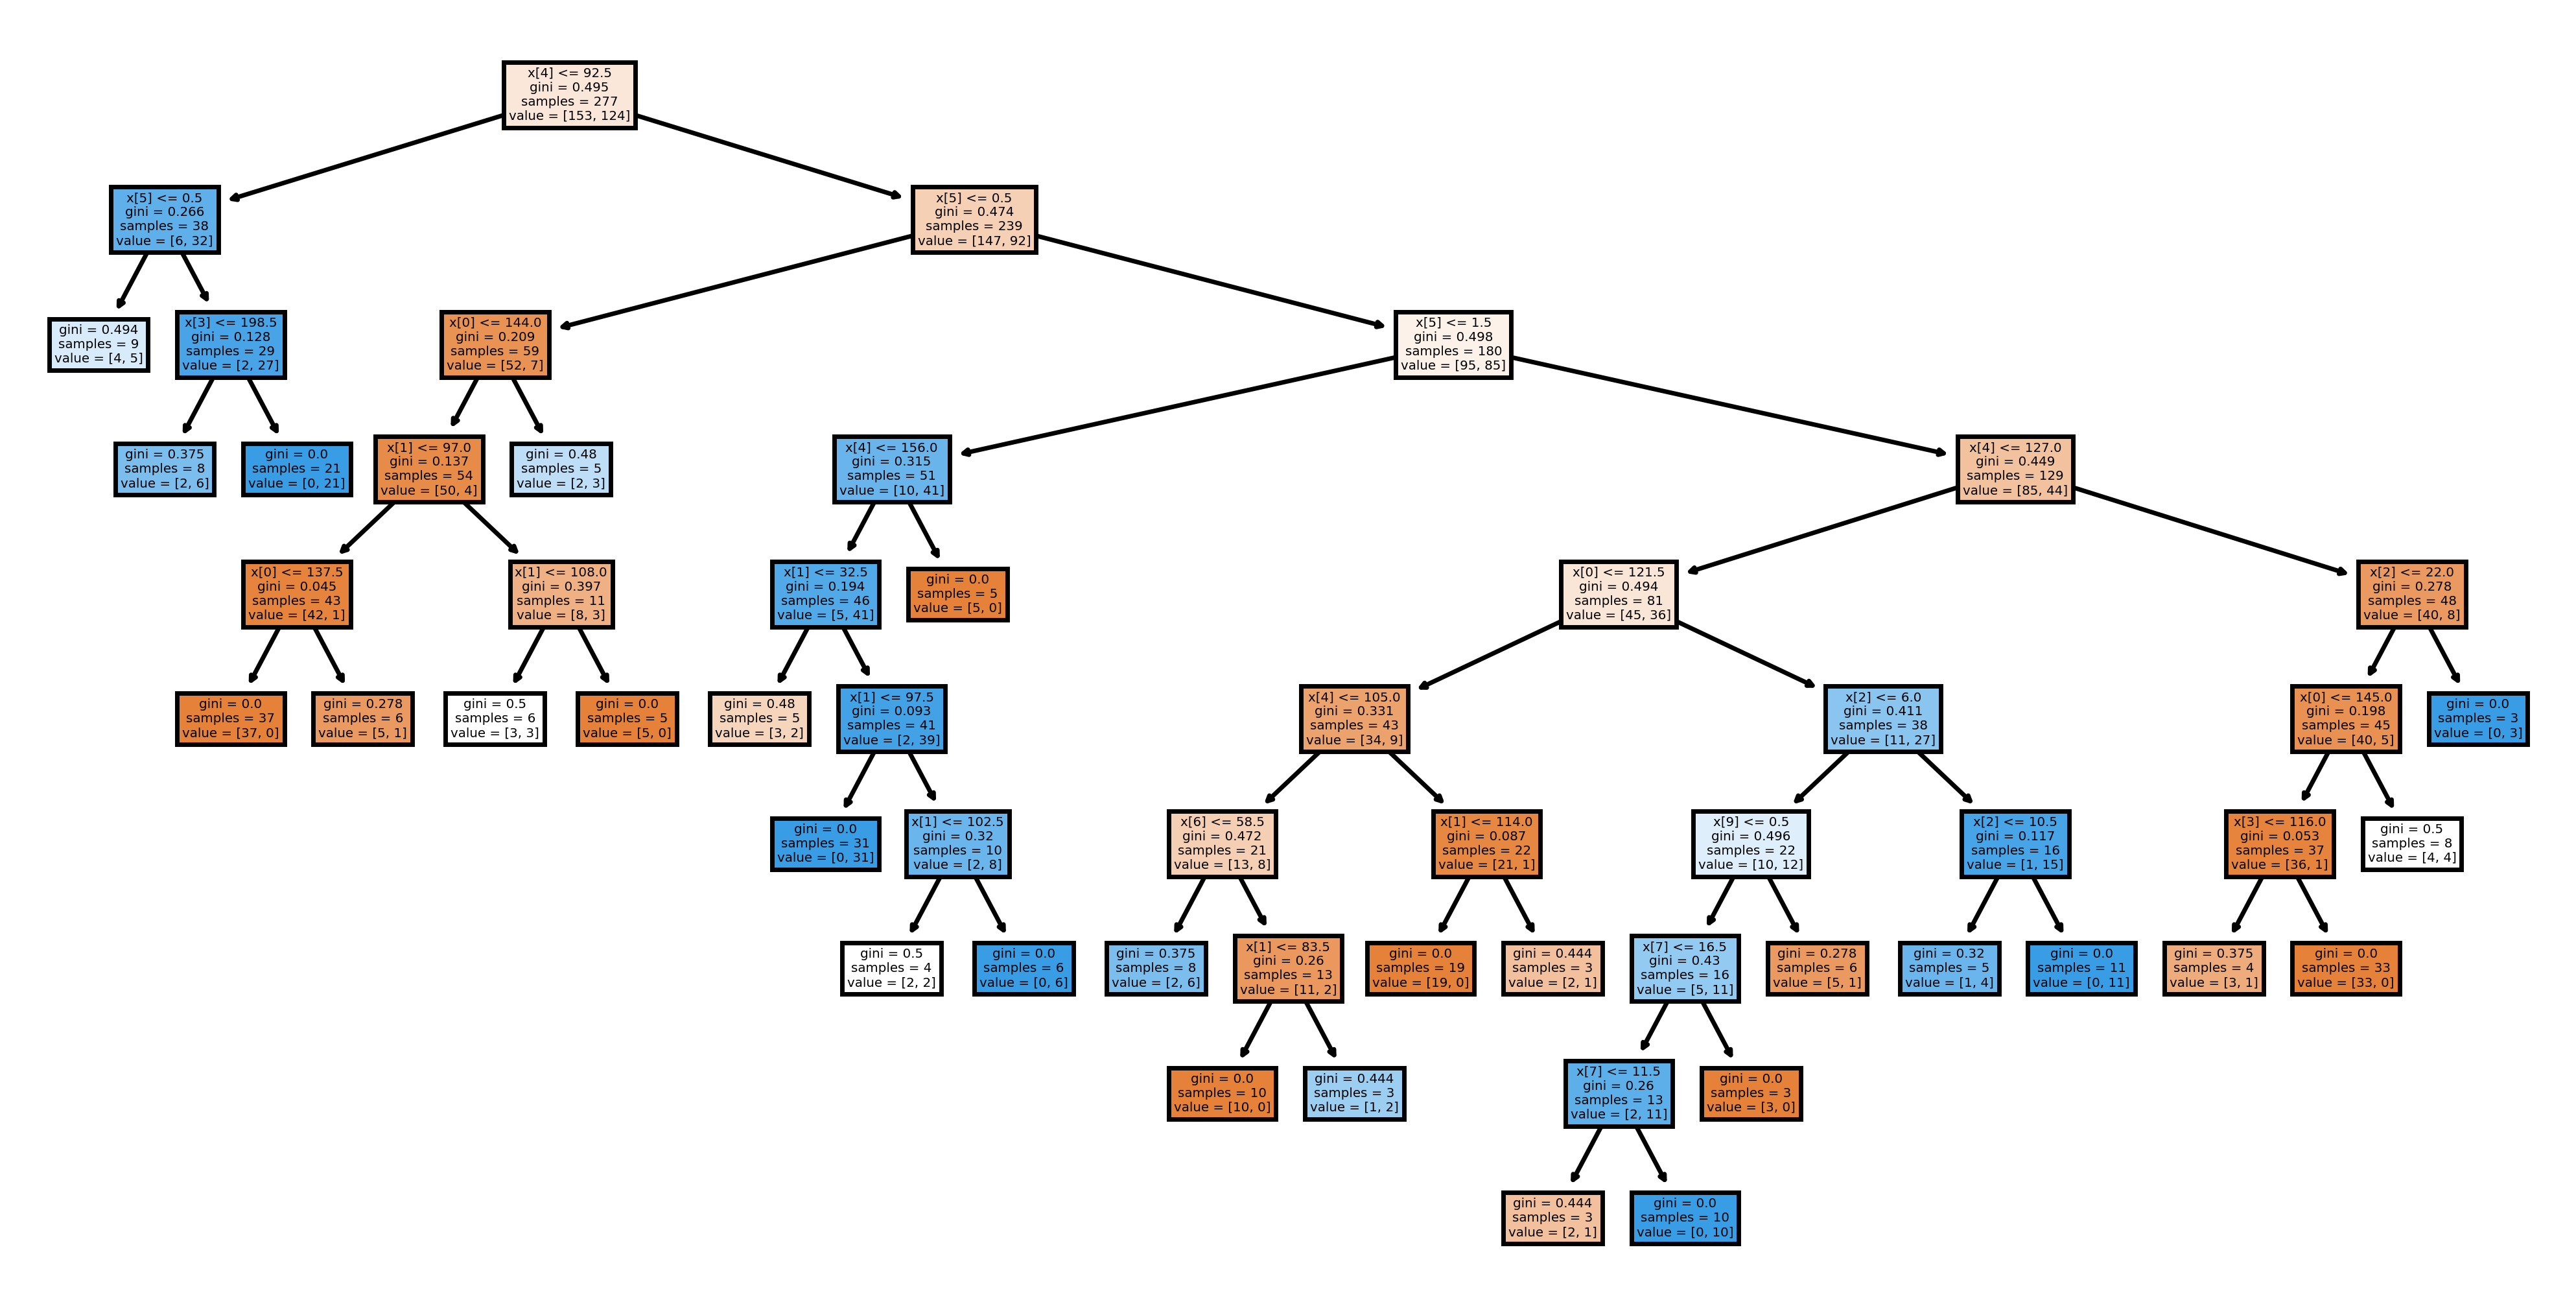

In [46]:
#### plt.figure(figsize=(10,10), dpi = 400)
tree.plot_tree(model.fit(x_train,y_train), filled=True);